In [1]:
%load_ext autoreload
%autoreload 2

# Init

In [4]:
import json
import sys
import re
import pickle as pkl
from pathlib import Path
from pprint import pprint
from collections import defaultdict
sys.path.append("../src")

import pandas as pd
from matplotlib import pyplot as plt
from joblib import Parallel, delayed

import constants
from scoring import chart
from gen.util import read_data, write_jsonl

In [21]:
da_root = Path("/users/k21190024/study/fact-checking-repos/fever/baseline/thesis/models/decomposable-attention")

da_acc_fever = da_root / "fever-da-doc-hp_tune"
da_acc_cfever = da_root / "climatefeverpure-da-doc-hp_tune"
da_acc_c_fever = da_root / "fever-climatefeverpure-da-doc-hp_tune"

# Hyperparameter tuning

In [6]:
def augment_metric(met):
    met["bias_variance"] = met["validation_loss"] - met["training_loss"]
    met["acc_diff"] = met["training_accuracy"] - met["validation_accuracy"]
    met["macro_fscore_diff"] = met["training_macro_fscore"] - met["validation_macro_fscore"]
    
    min_val_loss = fmet.nsmallest(5, columns="validation_loss", keep="first")[["epoch", "validation_loss", "bias_variance"]]
    min_val_loss["metric"] = "validation_loss"
    max_acc = fmet.nlargest(5, columns="validation_accuracy", keep="first")[["epoch", "validation_accuracy", "bias_variance"]]
    max_acc["metric"] = "validation_accuracy"
    max_f1 = fmet.nsmallest(5, columns="validation_macro_fscore", keep="first")[["epoch", "validation_macro_fscore", "bias_variance"]]
    max_f1["metric"] = "validation_macro_fscore"
    
    return pd.concat([min_val_loss, max_acc, max_f1], axis=0)

## FEVER

Using epoch 80

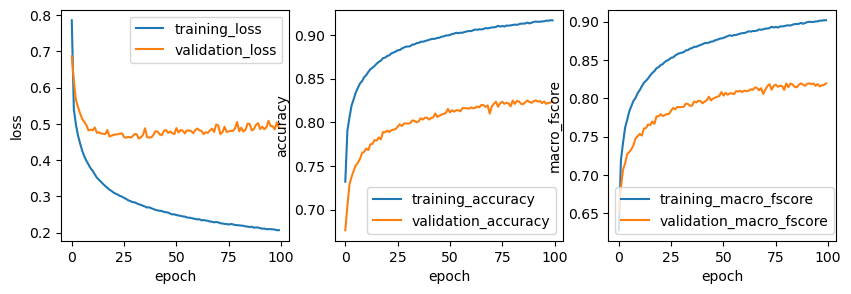

In [36]:
ax, fmet = chart.plot_finetune(da_acc_fever, return_metric=True)
fminmax = augment_metric(fmet)

In [38]:
fmet.loc[fmet["epoch"].isin(list(fminmax["epoch"].values)), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
82,0,0.686573,0.676368,0.651127
40,1,0.619190,0.703870,0.683174
55,2,0.565802,0.728873,0.706864
14,3,0.546394,0.737474,0.715019
94,4,0.528518,0.744374,0.727176
66,26,0.461794,0.797680,0.787436
37,28,0.462114,0.798580,0.788589
57,32,0.459521,0.801980,0.792952
22,37,0.462557,0.803080,0.794403
53,38,0.462652,0.805081,0.796681


In [39]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
30,87,0.4855,0.824882,0.819509


## Climate-FEVER

Using epoch 16

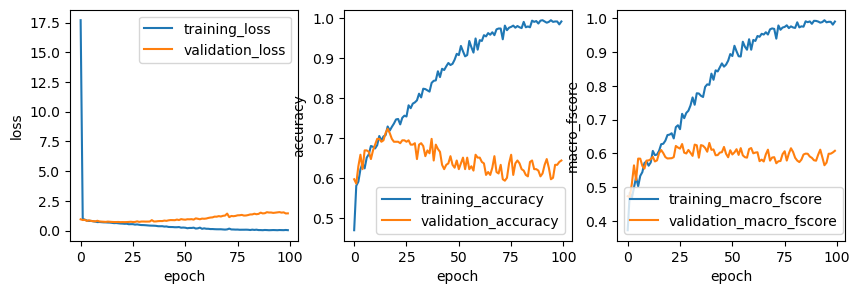

In [40]:
ax, fmet = chart.plot_finetune(da_acc_cfever, return_metric=True)
fminmax = augment_metric(fmet)

In [42]:
fmet.loc[fmet["epoch"].isin(list(fminmax["epoch"].values)), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
82,0,0.950490,0.597122,0.473434
40,1,0.891774,0.586331,0.471528
55,2,0.908164,0.629496,0.511350
94,4,0.867561,0.622302,0.521546
71,8,0.828228,0.647482,0.555248
65,11,0.745701,0.697842,0.582923
87,12,0.734373,0.697842,0.590129
42,15,0.730985,0.712230,0.601219
78,16,0.722185,0.723022,0.610063
43,17,0.721484,0.712230,0.601006


In [43]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
2,39,0.80311,0.683453,0.631107


## FEVER + Climate-FEVER

Using epoch 45

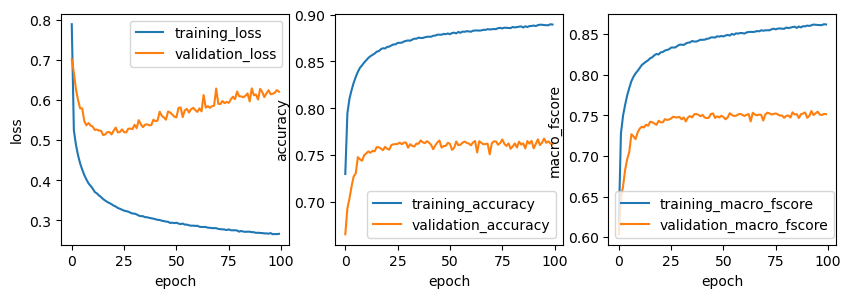

In [44]:
ax, fmet = chart.plot_finetune(da_acc_c_fever, return_metric=True)
fminmax = augment_metric(fmet)

In [46]:
fmet.loc[fmet["epoch"].isin(list(fminmax["epoch"].values)), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
82,0,0.701452,0.665467,0.603541
40,1,0.668552,0.693101,0.648866
55,2,0.626803,0.703610,0.662097
14,3,0.600082,0.716552,0.682515
94,4,0.579365,0.727158,0.695980
42,15,0.512497,0.758490,0.742035
78,16,0.514455,0.758393,0.741440
39,19,0.514282,0.758782,0.743269
32,22,0.519527,0.760728,0.745273
66,26,0.519118,0.763355,0.748317


In [47]:
fmet.loc[fmet["epoch"] == fmet["best_epoch"].max(), ["epoch", "validation_loss", "validation_accuracy", "validation_macro_fscore"]]

,epoch,validation_loss,validation_accuracy,validation_macro_fscore
63,92,0.607176,0.766858,0.75521
